In [1]:
import cv2 as CV
import imutils.paths as IP
import numpy as NP
import matplotlib.pyplot as PLT
import skimage.filters as SF

In [2]:
images = list(IP.list_images('Taxis')) #...CREATE A LIST OF ALL IMAGES WE HAVE IN FOLDER named AS 'TAXIS'
sift = CV.xfeatures2d.SIFT_create() #....CREATING OBJECT 

In [3]:
#for i in range(0,len(images),2):

A = NP.zeros((9,2))
F_X = NP.zeros((3,3))
F_Y = NP.zeros((3,3))
F_T = NP.zeros((3,3))

h_mask = NP.array([[-1,-2,-1],[0,0,0],[1,2,1]])
v_mask = NP.transpose(h_mask)

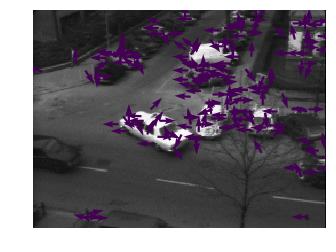

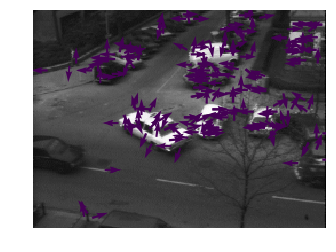

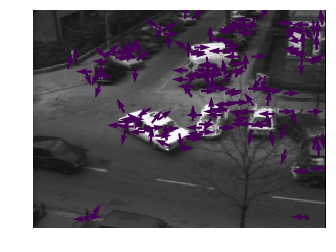

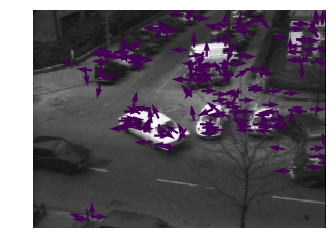

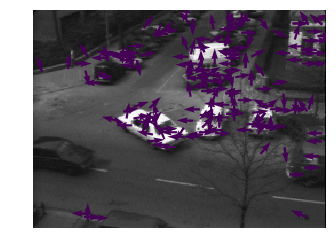

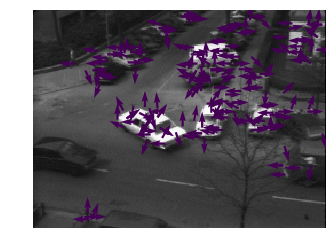

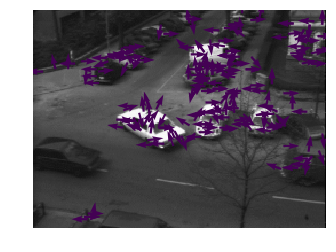

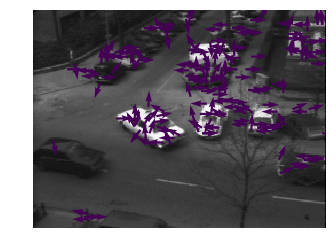

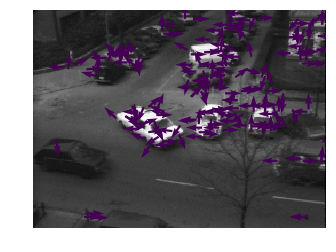

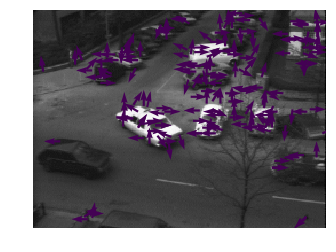

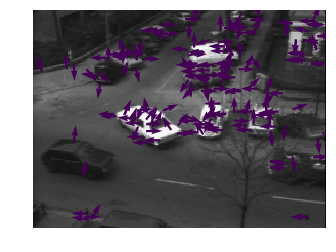

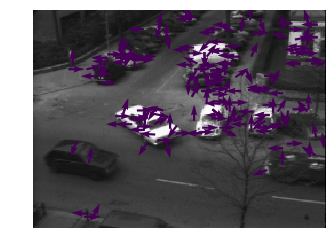

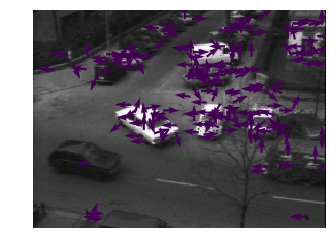

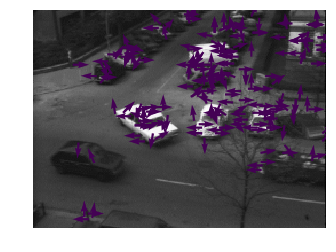

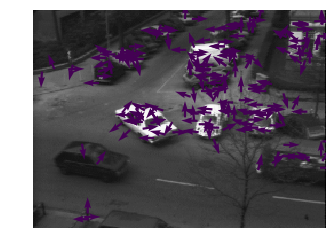

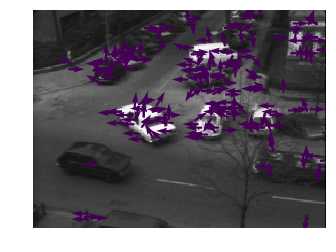

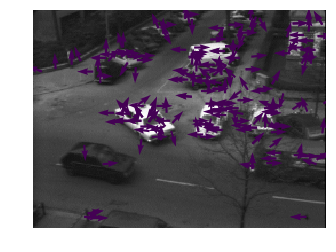

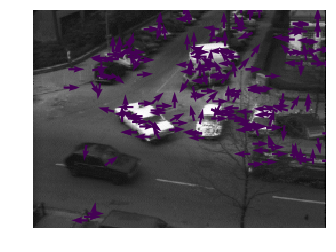

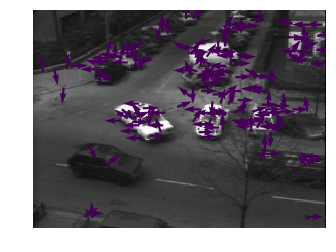

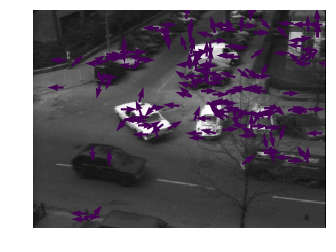

In [4]:
for k in range(0,len(images),2):
    PLT.figure(k+1)
    
    X1 = CV.imread(images[k])
    Y1 = X1
    I1 = CV.cvtColor(X1,CV.COLOR_BGR2GRAY)

    X2 = CV.imread(images[k+1])
    Y2 = X2
    I2 = CV.cvtColor(X2,CV.COLOR_BGR2GRAY)

    KP,d = sift.detectAndCompute(I1,None)
    X1 = CV.drawKeypoints(I1,KP,2)
    
    
    for i in range(0,len(KP)):
        X_COR = int(KP[i].pt[0])
        Y_COR = int(KP[i].pt[1])
        X_LOC = X_COR-2
        Y_LOC = Y_COR-2
    
    
        WINDOW_1 = I1[Y_LOC:Y_LOC+5,X_LOC:X_LOC+5]
        WINDOW_2 = I2[Y_LOC:Y_LOC+5,X_LOC:X_LOC+5]
        #F_X  = SF.sobel_h(WINDOW_1)
        #F_Y = SF.sobel_v(WINDOW_1)
        F_T =I1[Y_COR-1:Y_COR+2,X_COR-1:X_COR+2] - I2[Y_COR-1:Y_COR+2,X_COR-1:X_COR+2]
        
        for u in range(1,4):
            for v in range(1,4):
                W_1 = WINDOW_1[u-1:u+2,v-1:v+2]
                W_2 = WINDOW_2[u-1:u+2,v-1:v+2]
                F_X[u-1][v-1] = NP.sum(W_1*h_mask)
                F_Y[u-1][v-1] = NP.sum(W_1*v_mask)
        s1 = 0
        s2 = 0
        for p in range(0,2):
            for j in range(0,3):
                for k in range(0,3):
                    if p == 0:
                        A[s1][p] = F_X[j][k]
                        s1 = s1+1
                    else :
                        A[s2][p] = F_Y[j][k]
                        s2 = s2+1
        if NP.linalg.det(NP.dot(NP.transpose(A),A)) != 0:
            S = NP.dot(NP.dot(NP.linalg.inv(NP.dot(NP.transpose(A),A)),NP.transpose(A)),F_T.reshape(9,1))
            if int(S[1][0]) == 0 :
                S[1][0]= 0.001
        PLT.imshow(I1,'gray')
        PLT.quiver(X_COR,Y_COR,S[0][0],S[1][0],True)
                   
        PLT.axis('off')

    
#X_LIN = []
#Y_LIN = []
#X_LIN.append(X_COR)
#Y_LIN.append(Y_COR)
#PLT.quiver(X_COR,Y_COR,S[0][0],S[1][0])

#WINDOW_1 = NP.zeros((3,3))
#WINDOW_2 = NP.zeros((3,3))